In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [464]:
df=pd.read_csv("main.csv")
plt.style.use("ggplot")

In [465]:
df.shape

(335, 40)

In [466]:
# vymazanie atribútov, ktoré neobsahujú informácie užitočné pre analýzu.
df = df.drop(columns=['IP Address', 'Email Address', 'Custom Data 1','Respondent ID','First Name','Last Name','I am currently employed at least part-time','Collector ID','Start Date','End Date'])

In [467]:
# vymazanie Response
df = df.drop(index=0).reset_index(drop=True)

In [468]:
df.columns

Index(['I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume', 'Total length',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Age',
       'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object')

In [470]:
# zistenie počtu chybajucich hodnot
df.isnull().sum()

I identify as having a mental illness                             0
Education                                                         0
I have my own computer separate from a smart phone                0
I have been hospitalized before for my mental illness             0
How many days were you hospitalized for your mental illness      37
I am legally disabled                                             0
I have my regular access to the internet                          0
I live with my parents                                            0
I have a gap in my resume                                         0
Total length                                                      0
Annual income (including any social welfare programs) in USD      0
I am unemployed                                                   0
I read outside of work and school                                 0
Annual income from social welfare programs                        0
I receive food stamps                           

In [471]:
# premenovanie atribútov pre lepšie grafické znázornenie
df.rename(columns={'Unnamed: 28': 'Anxiety'}, inplace=True)
df.rename(columns={'Unnamed: 29': 'Depression'}, inplace=True)
df.rename(columns={'Unnamed: 31': 'Mood Swings'}, inplace=True)
df.rename(columns={'Unnamed: 32': 'Panic attacks'}, inplace=True)
df.rename(columns={'Unnamed: 33': 'Compulsive behavior'}, inplace=True)
df.rename(columns={'Unnamed: 30': 'Obsessive thinking'}, inplace=True)
df.rename(columns={'Unnamed: 34': 'Tiredness'}, inplace=True)
df.rename(columns={'Total length': 'Total length of any gaps in my resume in months'}, inplace=True)


In [455]:
df.rename(columns={'How many days were you hospitalized for your mental illness': 'Hospitalized Days'}, inplace=True)
df.rename(columns={'How many times were you hospitalized for your mental illness': 'Hospitalized Times'}, inplace=True)
df.rename(columns={'Annual income (including any social welfare programs) in USD': 'Annual Income',
                   'Annual income from social welfare programs': 'Social Welfare Income',
                   'Total length of any gaps in my resume in months': 'Resume Gaps Length'}, inplace=True)


In [456]:
# zmena dátového typu pre číselné atribúty a odstránenie prázdnych riadkov pre budúce vytváranie matice
numeric_attributes_new_names = ['Hospitalized Days','Hospitalized Times','Annual Income','Social Welfare Income','Resume Gaps Length']
df.dropna(subset=numeric_attributes_new_names, inplace=True)
df[numeric_attributes_new_names] = df[numeric_attributes_new_names].astype(int)


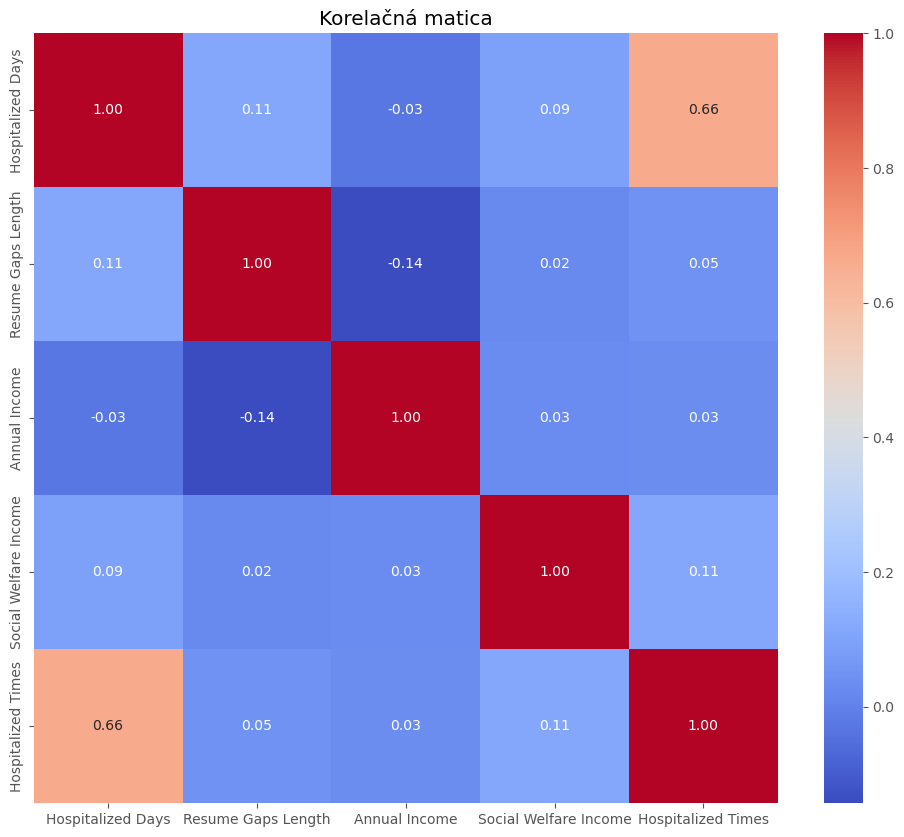

In [457]:
# korelačná matica
matrix=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Korelačná matica')
plt.show()

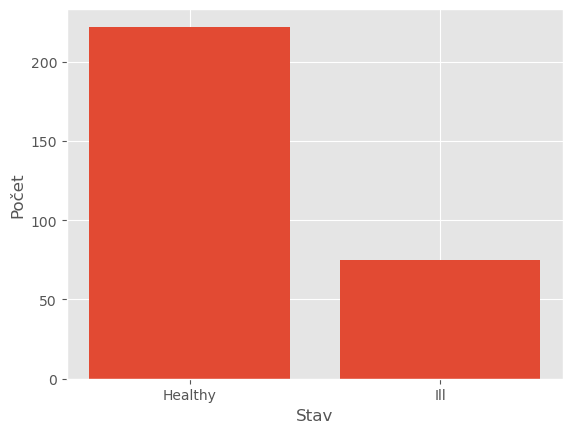

In [458]:
# vytvorenie grafu na vizualizáciu počtu respondentov s duševným ochorením
healthy = df[df['I identify as having a mental illness'] == "No"]
ill = df[df['I identify as having a mental illness'] == "Yes"]
plt.bar(['Healthy', 'Ill'], [len(healthy), len(ill)])
plt.xlabel('Stav')
plt.ylabel('Počet')
plt.show()

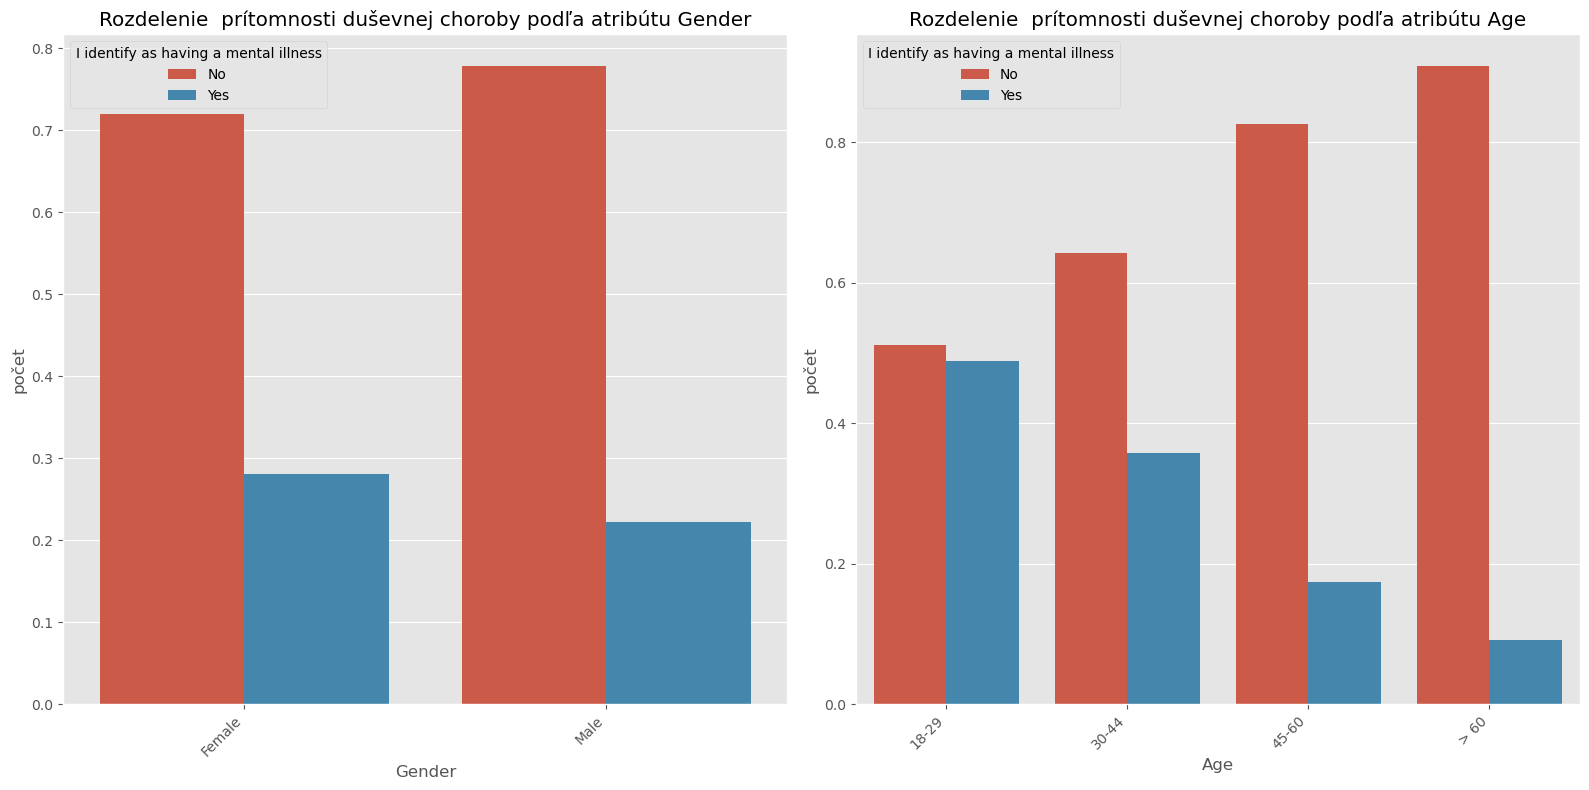

In [462]:
# Rozdelenie  prítomnosti duševnej choroby podľa roznych atribútov
var = ['Gender','Age']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8)) 

for k, ax in zip(range(len(var)), axes.flatten()):  
    prop_df = df.groupby([f'{var[k]}','I identify as having a mental illness']).size().reset_index(name='counts')
    prop_df['počet'] = prop_df.groupby(f'{var[k]}')['counts'].apply(lambda x: x/float(x.sum()))
    sns.barplot(data = prop_df, x = f'{var[k]}', y='počet',hue = 'I identify as having a mental illness', ax = ax)
    ax.set_title(f'Rozdelenie  prítomnosti duševnej choroby podľa atribútu {var[k]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')  

plt.tight_layout()  
plt.show()


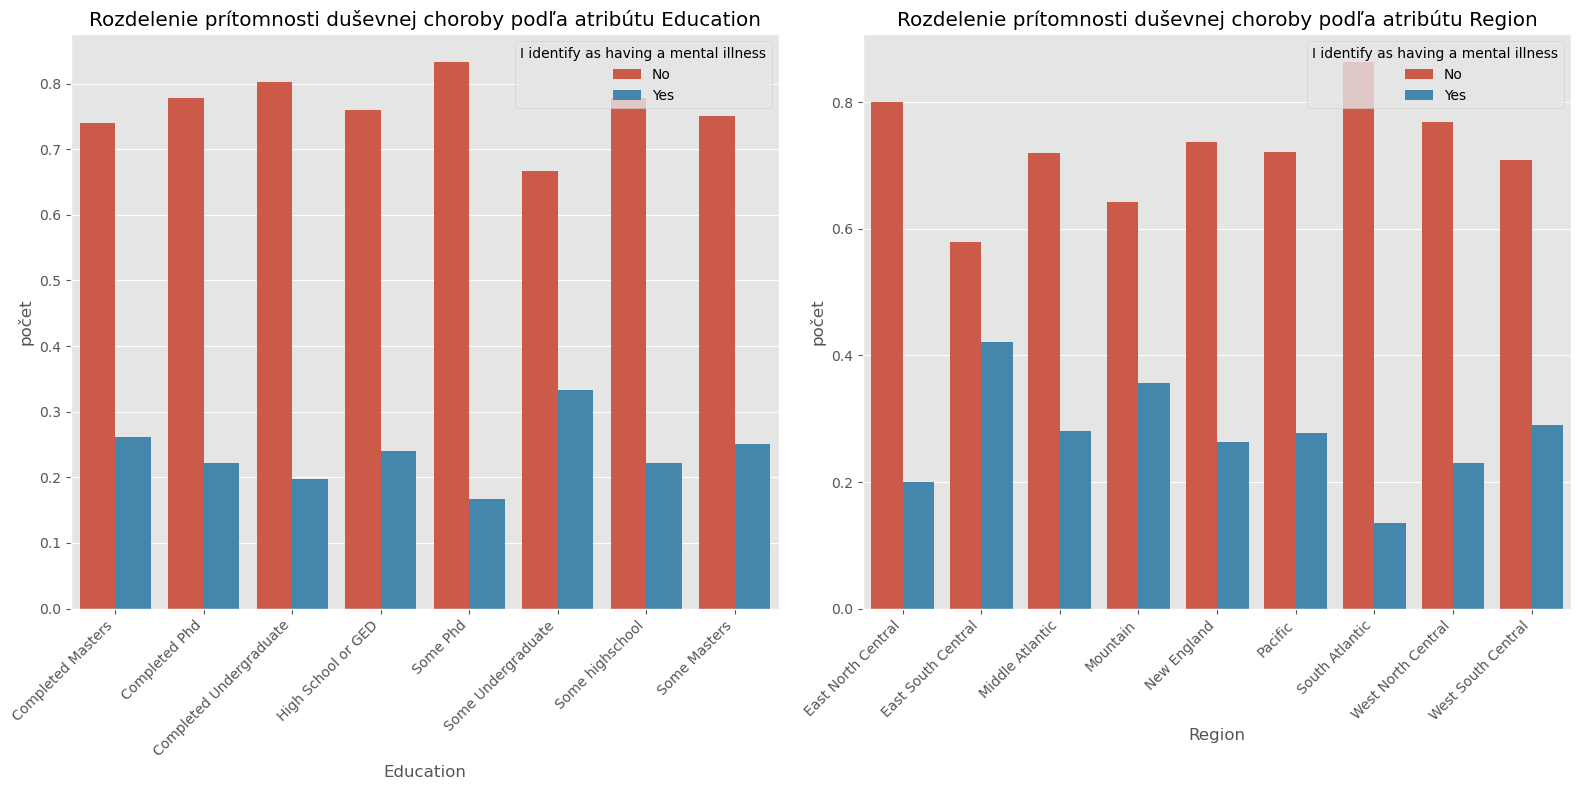

In [461]:
var = ['Education','Region']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8)) 

for k, ax in zip(range(len(var)), axes.flatten()):  
    prop_df = df.groupby([f'{var[k]}','I identify as having a mental illness']).size().reset_index(name='counts')
    prop_df['počet'] = prop_df.groupby(f'{var[k]}')['counts'].apply(lambda x: x/float(x.sum()))
    sns.barplot(data = prop_df, x = f'{var[k]}', y='počet',hue = 'I identify as having a mental illness', ax = ax)
    ax.set_title(f'Rozdelenie prítomnosti duševnej choroby podľa atribútu {var[k]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')  

plt.tight_layout()  
plt.show()


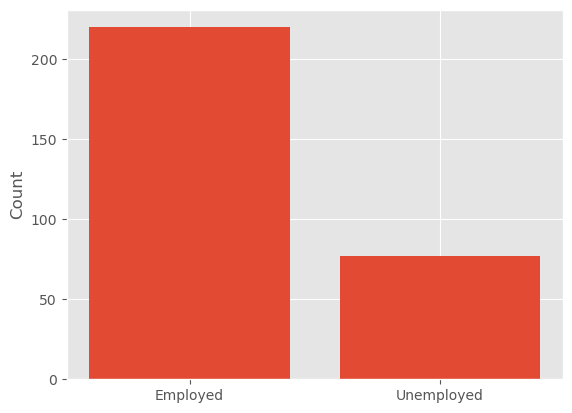

In [297]:
# vytvorenie grafu na vizualizáciu počtu zamestnanych a nezamestnanych respondentov
empl = df[df['I am unemployed'] == "No"]
unempl = df[df['I am unemployed'] == "Yes"]
plt.bar(['Employed', 'Unemployed'], [len(empl), len(unempl)])
plt.ylabel('Count')
plt.show()

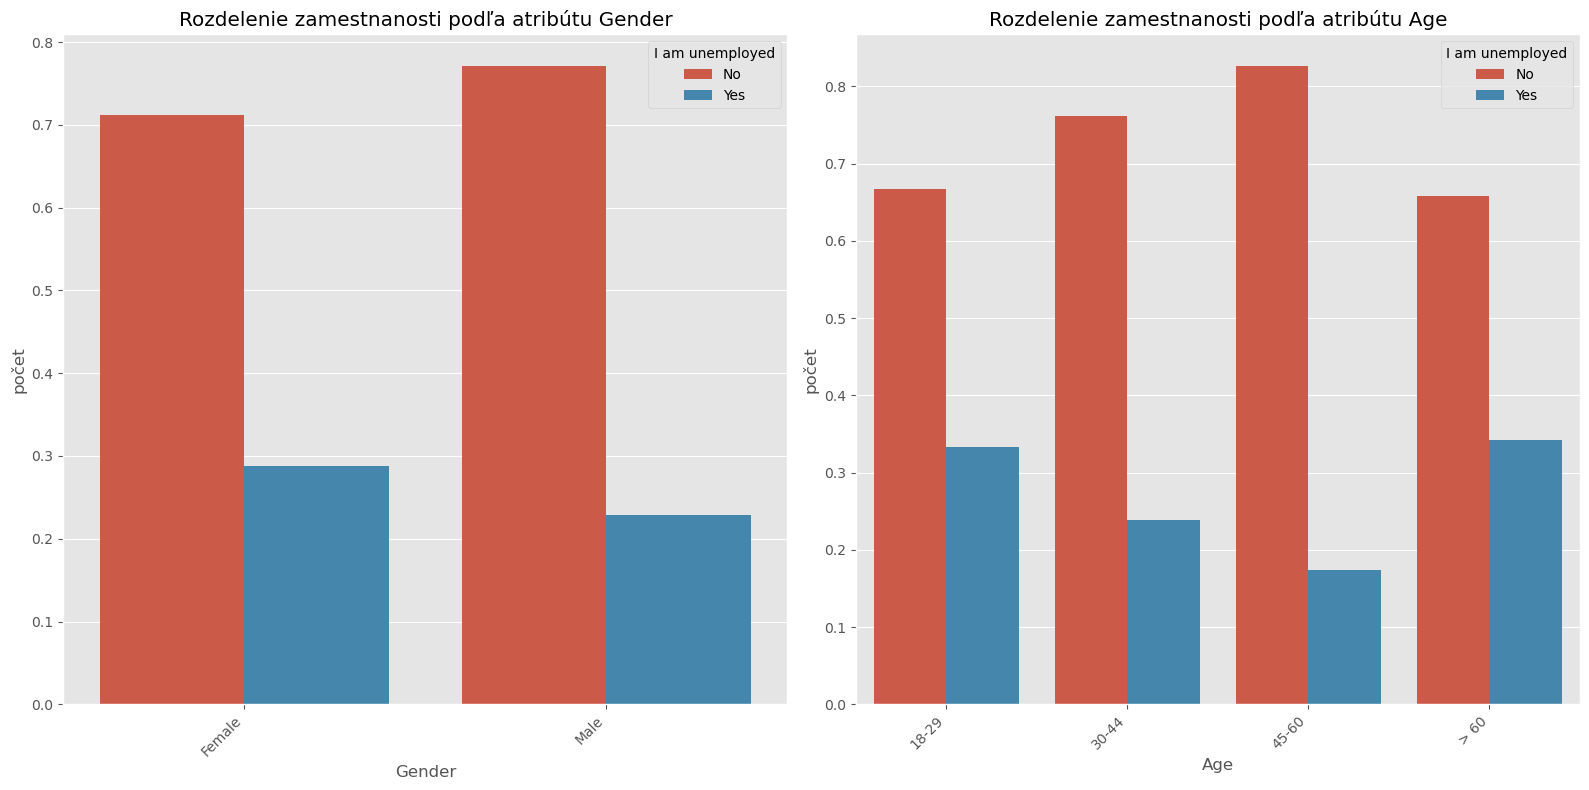

In [441]:
# Rozdelenie  zamestnanosti podľa roznych atribútov
var = ['Gender','Age']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8)) 

for k, ax in zip(range(len(var)), axes.flatten()):  
    prop_df = df.groupby([f'{var[k]}','I am unemployed']).size().reset_index(name='counts')
    prop_df['počet'] = prop_df.groupby(f'{var[k]}')['counts'].apply(lambda x: x/float(x.sum()))
    sns.barplot(data = prop_df, x = f'{var[k]}', y='počet',hue = 'I am unemployed', ax = ax)
    ax.set_title(f'Rozdelenie zamestnanosti podľa atribútu {var[k]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')  

plt.tight_layout()  
plt.show()


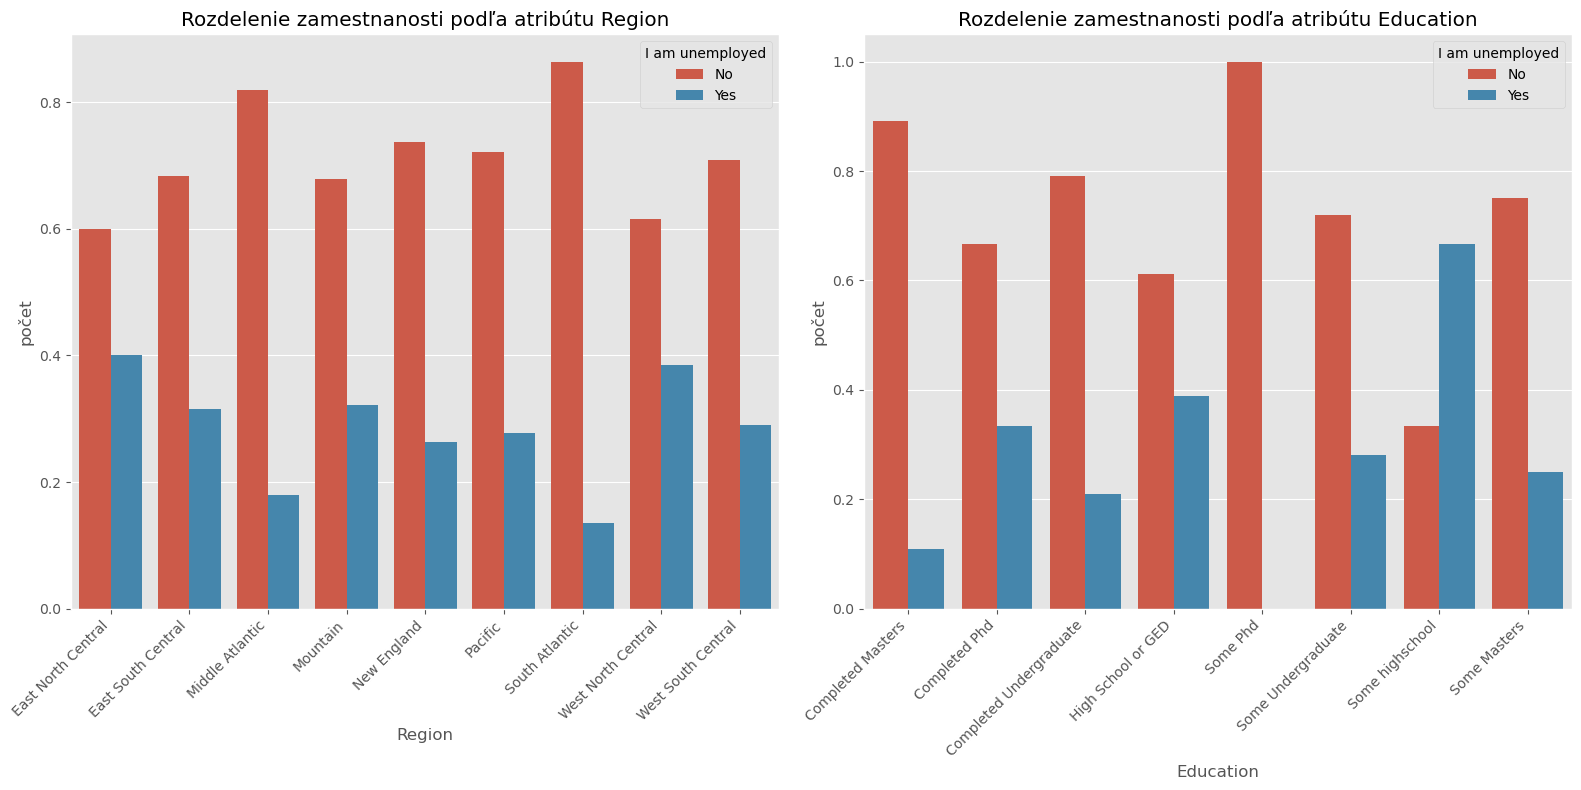

In [444]:
var = ['Region','Education']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8)) 

for k, ax in zip(range(len(var)), axes.flatten()):  
    prop_df = df.groupby([f'{var[k]}','I am unemployed']).size().reset_index(name='counts')
    prop_df['počet'] = prop_df.groupby(f'{var[k]}')['counts'].apply(lambda x: x/float(x.sum()))
    sns.barplot(data = prop_df, x = f'{var[k]}', y='počet',hue = 'I am unemployed', ax = ax)
    ax.set_title(f'Rozdelenie zamestnanosti podľa atribútu {var[k]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')  

plt.tight_layout()  
plt.show()


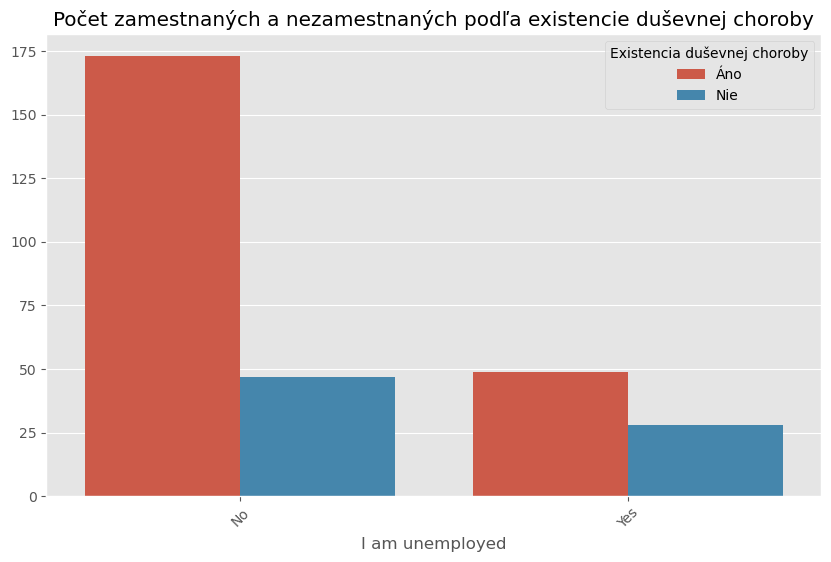

In [303]:
# vytvorebie grafa pre zistenie počtu zamestnaných a nezamestnaných podľa existencie duševnej choroby
plt.figure(figsize=(10, 6))
sns.countplot(x='I am unemployed', hue='I identify as having a mental illness', data=df, order=df['I am unemployed'].value_counts().index)
plt.title('Počet zamestnaných a nezamestnaných podľa existencie duševnej choroby')
plt.xlabel('I am unemployed')
plt.ylabel('')
plt.legend(title='Existencia duševnej choroby', loc='upper right',labels=['Áno','Nie'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Následne som trochu manipulovala s dátami, aby test chí kvadrát dobre fungoval.

In [410]:
df['Anxiety'].fillna(0, inplace=True)
df['Anxiety'] = df['Anxiety'].apply(lambda x: 1 if x != 0 else 0)
df['Depression'].fillna(0, inplace=True)
df['Depression'] = df['Depression'].apply(lambda x: 1 if x != 0 else 0)
df['Mood Swings'].fillna(0, inplace=True)
df['Mood Swings'] = df['Mood Swings'].apply(lambda x: 1 if x != 0 else 0)
df['Panic attacks'].fillna(0, inplace=True)
df['Panic attacks'] = df['Panic attacks'].apply(lambda x: 1 if x != 0 else 0)
df['Compulsive behavior'].fillna(0, inplace=True)
df['Compulsive behavior'] = df['Compulsive behavior'].apply(lambda x: 1 if x != 0 else 0)
df['Obsessive thinking'].fillna(0, inplace=True)
df['Obsessive thinking'] = df['Obsessive thinking'].apply(lambda x: 1 if x != 0 else 0)
df['Tiredness'].fillna(0, inplace=True)
df['Tiredness'] = df['Tiredness'].apply(lambda x: 1 if x != 0 else 0)
df['Lack of concentration'].fillna(0, inplace=True)
df['Lack of concentration'] = df['Lack of concentration'].apply(lambda x: 1 if x != 0 else 0)

In [411]:
dtype_dict = {
    'I identify as having a mental illness': 'category',
    'Education': 'category',
    'I have my own computer separate from a smart phone': 'category',
    'I have been hospitalized before for my mental illness': 'category',
    'I am legally disabled': 'category',
    'I have my regular access to the internet': 'category',
    'I live with my parents': 'category',
    'I have a gap in my resume': 'category',
    'I am unemployed': 'category',
    'I read outside of work and school': 'category',
    'I receive food stamps': 'category',
    'I am on section 8 housing': 'category',
    'Lack of concentration': 'category',
    'Anxiety': 'category',
    'Depression': 'category',
    'Obsessive thinking': 'category',
    'Mood Swings': 'category',
    'Panic attacks': 'category',
    'Compulsive behavior': 'category',
    'Tiredness': 'category',
    'Age': 'category',
    'Gender': 'category',
    'Household Income': 'category',
    'Region': 'category',
    'Device Type': 'category'
}
df = df.astype(dtype_dict)


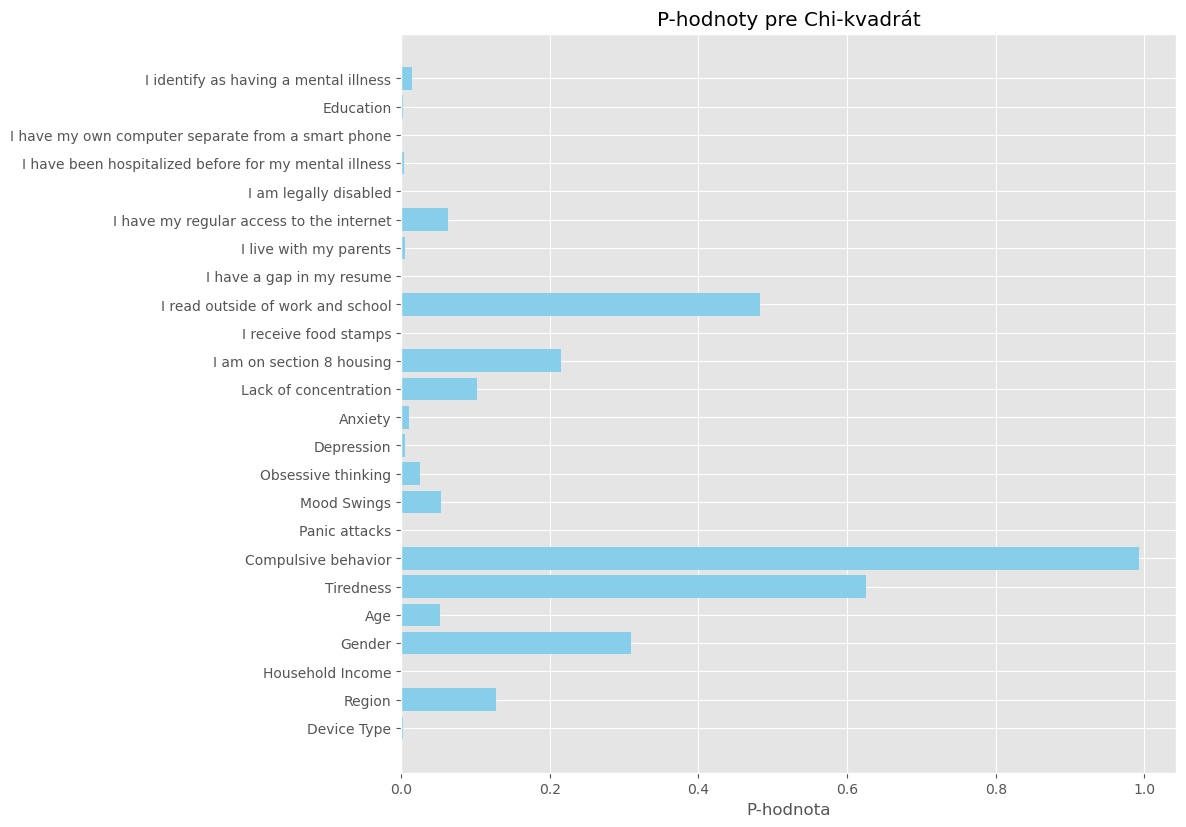

In [413]:
# chí kvadrát test pre kategorické atribúty
contingency_tables = {}
for column in df.columns:
    if column != 'I am unemployed' and df[column].dtype == 'category': 
        contingency_table = pd.crosstab(df['I am unemployed'], df[column])
        if not contingency_table.empty:
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            contingency_tables[column] = {'Chi-square': chi2, 'P-value': p_value}

attributes = list(contingency_tables.keys())
p_values = [table['P-value'] for table in contingency_tables.values()]
attributes = list(contingency_tables.keys())
p_values = [table['P-value'] for table in contingency_tables.values()]
plt.figure(figsize=(10, len(attributes) * 0.4))
plt.barh(attributes, p_values, color='skyblue')
plt.xlabel('P-hodnota')
plt.title('P-hodnoty pre Chi-kvadrát')
plt.gca().invert_yaxis()
plt.show()